In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

import matplotlib.pyplot as plt

from scipy.stats import randint
from numpy import argmax
from scipy import stats

In [2]:
from sklearn.metrics import cohen_kappa_score

In [3]:
import sklearn
sklearn.__version__

'1.1.1'

In [4]:
from collections import Counter
from sklearn.metrics import cohen_kappa_score

# Concordance of Train data with each other (with DILI compounds)

In [5]:
train_data_features= pd.read_csv("../Train_data_liv_tox.csv")
train_data = train_data_features[~train_data_features.Source_rank.isin([2, 4, 9, 10, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,ABJKWBDEJIDSJZ,C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0,0,...,0.000000,10.085517,58.622510,318.221626,6.119647,1498.0,36.0,126.0,145.0,5.138889
1,COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACRHBAYQBXXRTO-UHFFFAOYSA-N,ACRHBAYQBXXRTO,COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...,0,0,...,5.293305,10.572726,78.667003,470.276975,6.531625,4157.0,58.0,178.0,212.0,7.750000
2,O=C(O)C(S)C(S)C(=O)O,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACTRVOBWPAIOHC-UHFFFAOYSA-N,ACTRVOBWPAIOHC,O=C([O-])C(S)C(S)C(=O)[O-],0,1,...,0.000000,8.702676,38.654211,179.956198,12.854014,121.0,12.0,42.0,45.0,2.333333
3,NC1CC1c1ccccc1,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AELCINSCMGFISI-UHFFFAOYSA-N,AELCINSCMGFISI,[NH3+]C1CC1c1ccccc1,0,0,...,7.664347,9.206634,59.600240,134.096426,6.095292,119.0,10.0,52.0,61.0,2.222222
4,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AEQGYUJKXATLBW-UHFFFAOYSA-N,AEQGYUJKXATLBW,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,0,0,...,7.247793,10.915325,85.019190,458.266839,6.454463,3111.0,67.0,190.0,235.0,6.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13698,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZLHVIYHWWQYJID-UHFFFAOYSA-N,ZLHVIYHWWQYJID,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,0,...,0.000000,9.860110,51.351894,240.078644,8.002621,598.0,28.0,96.0,113.0,3.916667
13699,CCCCSP(=O)(SCCCC)SCCCC,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZOKXUAHZSKEQSS-UHFFFAOYSA-N,ZOKXUAHZSKEQSS,CCCCSP(=O)(SCCCC)SCCCC,0,0,...,0.000000,8.981304,47.595574,314.096165,7.138549,616.0,18.0,68.0,70.0,4.375000
13700,O=C1CC(c2ccccc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZONYXWQDUYMKFB-UHFFFAOYSA-N,ZONYXWQDUYMKFB,O=C1CC(c2ccccc2)Oc2ccccc21,0,0,...,0.000000,9.786336,50.012654,224.083730,7.727025,500.0,26.0,90.0,106.0,3.750000
13701,O=C(O)CCC(=O)c1ccc(-c2ccccc2)cc1,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZPAKPRAICRBAOD-UHFFFAOYSA-N,ZPAKPRAICRBAOD,O=C([O-])CCC(=O)c1ccc(-c2ccccc2)cc1,0,0,...,0.000000,9.556834,51.655875,253.087018,7.908969,808.0,25.0,92.0,103.0,4.305556


In [6]:
test_data= pd.read_csv("../Test_data_DILIst_1111.csv")[["smiles_r","TOXICITY","Source_rank","Source"]]
test_data["Source_rank"] = "DILI"
test_data

,smiles_r,TOXICITY,Source_rank,Source
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,DILI,DILIst Classification Oral
1,COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...,1,DILI,DILIst Classification
2,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,1,DILI,DILIst Classification
3,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...,1,DILI,DILIst Classification oral
4,CC1OC1[P](=O)(=O)O,1,DILI,DILIst Classification Oral
...,...,...,...,...
1106,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,DILI,DILIst Classification
1107,CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...,0,DILI,DILIst Classification Intravenous
1108,CCC(c1cccc(O)c1)C(C)CN(C)C,0,DILI,DILIst Classification Oral
1109,CC(N)Cc1ccccc1,0,DILI,DILIst Classification Oral


In [7]:
#For this excercise we have NOT removed compounds that are also present in the DILI dataset
train_data = train_data[~train_data.Source_rank.isin([2, 4, 9, 10, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,ABJKWBDEJIDSJZ,C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0,0,...,0.000000,10.085517,58.622510,318.221626,6.119647,1498.0,36.0,126.0,145.0,5.138889
1,COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACRHBAYQBXXRTO-UHFFFAOYSA-N,ACRHBAYQBXXRTO,COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...,0,0,...,5.293305,10.572726,78.667003,470.276975,6.531625,4157.0,58.0,178.0,212.0,7.750000
2,O=C(O)C(S)C(S)C(=O)O,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACTRVOBWPAIOHC-UHFFFAOYSA-N,ACTRVOBWPAIOHC,O=C([O-])C(S)C(S)C(=O)[O-],0,1,...,0.000000,8.702676,38.654211,179.956198,12.854014,121.0,12.0,42.0,45.0,2.333333
3,NC1CC1c1ccccc1,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AELCINSCMGFISI-UHFFFAOYSA-N,AELCINSCMGFISI,[NH3+]C1CC1c1ccccc1,0,0,...,7.664347,9.206634,59.600240,134.096426,6.095292,119.0,10.0,52.0,61.0,2.222222
4,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AEQGYUJKXATLBW-UHFFFAOYSA-N,AEQGYUJKXATLBW,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,0,0,...,7.247793,10.915325,85.019190,458.266839,6.454463,3111.0,67.0,190.0,235.0,6.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13698,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZLHVIYHWWQYJID-UHFFFAOYSA-N,ZLHVIYHWWQYJID,O=C1CC(c2ccc(O)cc2)Oc2ccccc21,0,0,...,0.000000,9.860110,51.351894,240.078644,8.002621,598.0,28.0,96.0,113.0,3.916667
13699,CCCCSP(=O)(SCCCC)SCCCC,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZOKXUAHZSKEQSS-UHFFFAOYSA-N,ZOKXUAHZSKEQSS,CCCCSP(=O)(SCCCC)SCCCC,0,0,...,0.000000,8.981304,47.595574,314.096165,7.138549,616.0,18.0,68.0,70.0,4.375000
13700,O=C1CC(c2ccccc2)Oc2ccccc21,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZONYXWQDUYMKFB-UHFFFAOYSA-N,ZONYXWQDUYMKFB,O=C1CC(c2ccccc2)Oc2ccccc21,0,0,...,0.000000,9.786336,50.012654,224.083730,7.727025,500.0,26.0,90.0,106.0,3.750000
13701,O=C(O)CCC(=O)c1ccc(-c2ccccc2)cc1,0,16,Reactive Metabolite Mazzolari et al,LivTox,ZPAKPRAICRBAOD-UHFFFAOYSA-N,ZPAKPRAICRBAOD,O=C([O-])CCC(=O)c1ccc(-c2ccccc2)cc1,0,0,...,0.000000,9.556834,51.655875,253.087018,7.908969,808.0,25.0,92.0,103.0,4.305556


In [8]:
train_data = pd.concat([train_data, test_data]).reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,ABJKWBDEJIDSJZ,C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0.0,0.0,...,0.000000,10.085517,58.622510,318.221626,6.119647,1498.0,36.0,126.0,145.0,5.138889
1,COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACRHBAYQBXXRTO-UHFFFAOYSA-N,ACRHBAYQBXXRTO,COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...,0.0,0.0,...,5.293305,10.572726,78.667003,470.276975,6.531625,4157.0,58.0,178.0,212.0,7.750000
2,O=C(O)C(S)C(S)C(=O)O,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,ACTRVOBWPAIOHC-UHFFFAOYSA-N,ACTRVOBWPAIOHC,O=C([O-])C(S)C(S)C(=O)[O-],0.0,1.0,...,0.000000,8.702676,38.654211,179.956198,12.854014,121.0,12.0,42.0,45.0,2.333333
3,NC1CC1c1ccccc1,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AELCINSCMGFISI-UHFFFAOYSA-N,AELCINSCMGFISI,[NH3+]C1CC1c1ccccc1,0.0,0.0,...,7.664347,9.206634,59.600240,134.096426,6.095292,119.0,10.0,52.0,61.0,2.222222
4,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,1,3,"human hepatotoxicity, hepatobiallry, literaty...",LivTox,AEQGYUJKXATLBW-UHFFFAOYSA-N,AEQGYUJKXATLBW,CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...,0.0,0.0,...,7.247793,10.915325,85.019190,458.266839,6.454463,3111.0,67.0,190.0,235.0,6.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14809,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,DILI,DILIst Classification,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14810,CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...,0,DILI,DILIst Classification Intravenous,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14811,CCC(c1cccc(O)c1)C(C)CN(C)C,0,DILI,DILIst Classification Oral,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14812,CC(N)Cc1ccccc1,0,DILI,DILIst Classification Oral,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in train_data.Source_rank.unique():

 if (len(train_data[train_data["Source_rank"]==i]) != len(train_data[train_data["Source_rank"]==i].smiles_r.unique())):
    print(i)

In [10]:
all_sources_list = [ 3,  5,  6,  7,  8,  11, 14, 15, 16, "DILI"]
all_sources_list

[3, 5, 6, 7, 8, 11, 14, 15, 16, 'DILI']

In [11]:
list_of_kappa=[]

for i in all_sources_list:
    for j in all_sources_list:
        
        df1 = train_data[train_data["Source_rank"]==i][["smiles_r","TOXICITY"]].drop_duplicates(keep=False).reset_index(drop=True)
        df1 = df1.rename(columns={"TOXICITY": "TOXICITY_1"})
        df2 = train_data[train_data["Source_rank"]==j][["smiles_r","TOXICITY"]].drop_duplicates(keep=False).reset_index(drop=True)
        df2 = df2.rename(columns={"TOXICITY": "TOXICITY_2"})
        
        merged_df = pd.merge(df1, df2, on="smiles_r").reset_index(drop=True)
        size = len(merged_df)
        print(size)

        labeler1 = merged_df.TOXICITY_1.to_list()
        labeler2 = merged_df.TOXICITY_2.to_list()
        kappa_score = cohen_kappa_score(labeler1, labeler2)
        
        row= [i, j ,size, kappa_score ]
        list_of_kappa.append(row)
        

1533
40
45
1192
366
414
355
794
75
364
40
544
121
170
16
11
11
405
26
2
45
121
673
242
19
15
16
369
29
2
1192
170
242
2529
303
306
328
1214
118
320
366
16
19
303
1172
319
118
326
49
65
414
11
15
306
319
520
140
274
26
70
355
11
16
328
118
140
690
359
47
242
794
405
369
1214
326
274
359
5670
165
430
75
26
29
118
49
26
47
165
372
55
364
2
2
320
65
70
242
430
55
1111


In [12]:
results_kappa1  = pd.DataFrame(list_of_kappa, columns=["i", "j", "size", "cohen_kappa_score"])
results_kappa1

,i,j,size,cohen_kappa_score
0,3,3,1533,1.000000
1,3,5,40,-0.184211
2,3,6,45,0.100000
3,3,7,1192,0.595248
4,3,8,366,0.494089
...,...,...,...,...
95,DILI,11,70,0.278351
96,DILI,14,242,0.140196
97,DILI,15,430,0.062511
98,DILI,16,55,0.073034


In [13]:
annot = results_kappa1["size"].to_numpy()
annot = annot.reshape(10,10)
annot

array([[1533,   40,   45, 1192,  366,  414,  355,  794,   75,  364],
       [  40,  544,  121,  170,   16,   11,   11,  405,   26,    2],
       [  45,  121,  673,  242,   19,   15,   16,  369,   29,    2],
       [1192,  170,  242, 2529,  303,  306,  328, 1214,  118,  320],
       [ 366,   16,   19,  303, 1172,  319,  118,  326,   49,   65],
       [ 414,   11,   15,  306,  319,  520,  140,  274,   26,   70],
       [ 355,   11,   16,  328,  118,  140,  690,  359,   47,  242],
       [ 794,  405,  369, 1214,  326,  274,  359, 5670,  165,  430],
       [  75,   26,   29,  118,   49,   26,   47,  165,  372,   55],
       [ 364,    2,    2,  320,   65,   70,  242,  430,   55, 1111]])

cohen_kappa_score


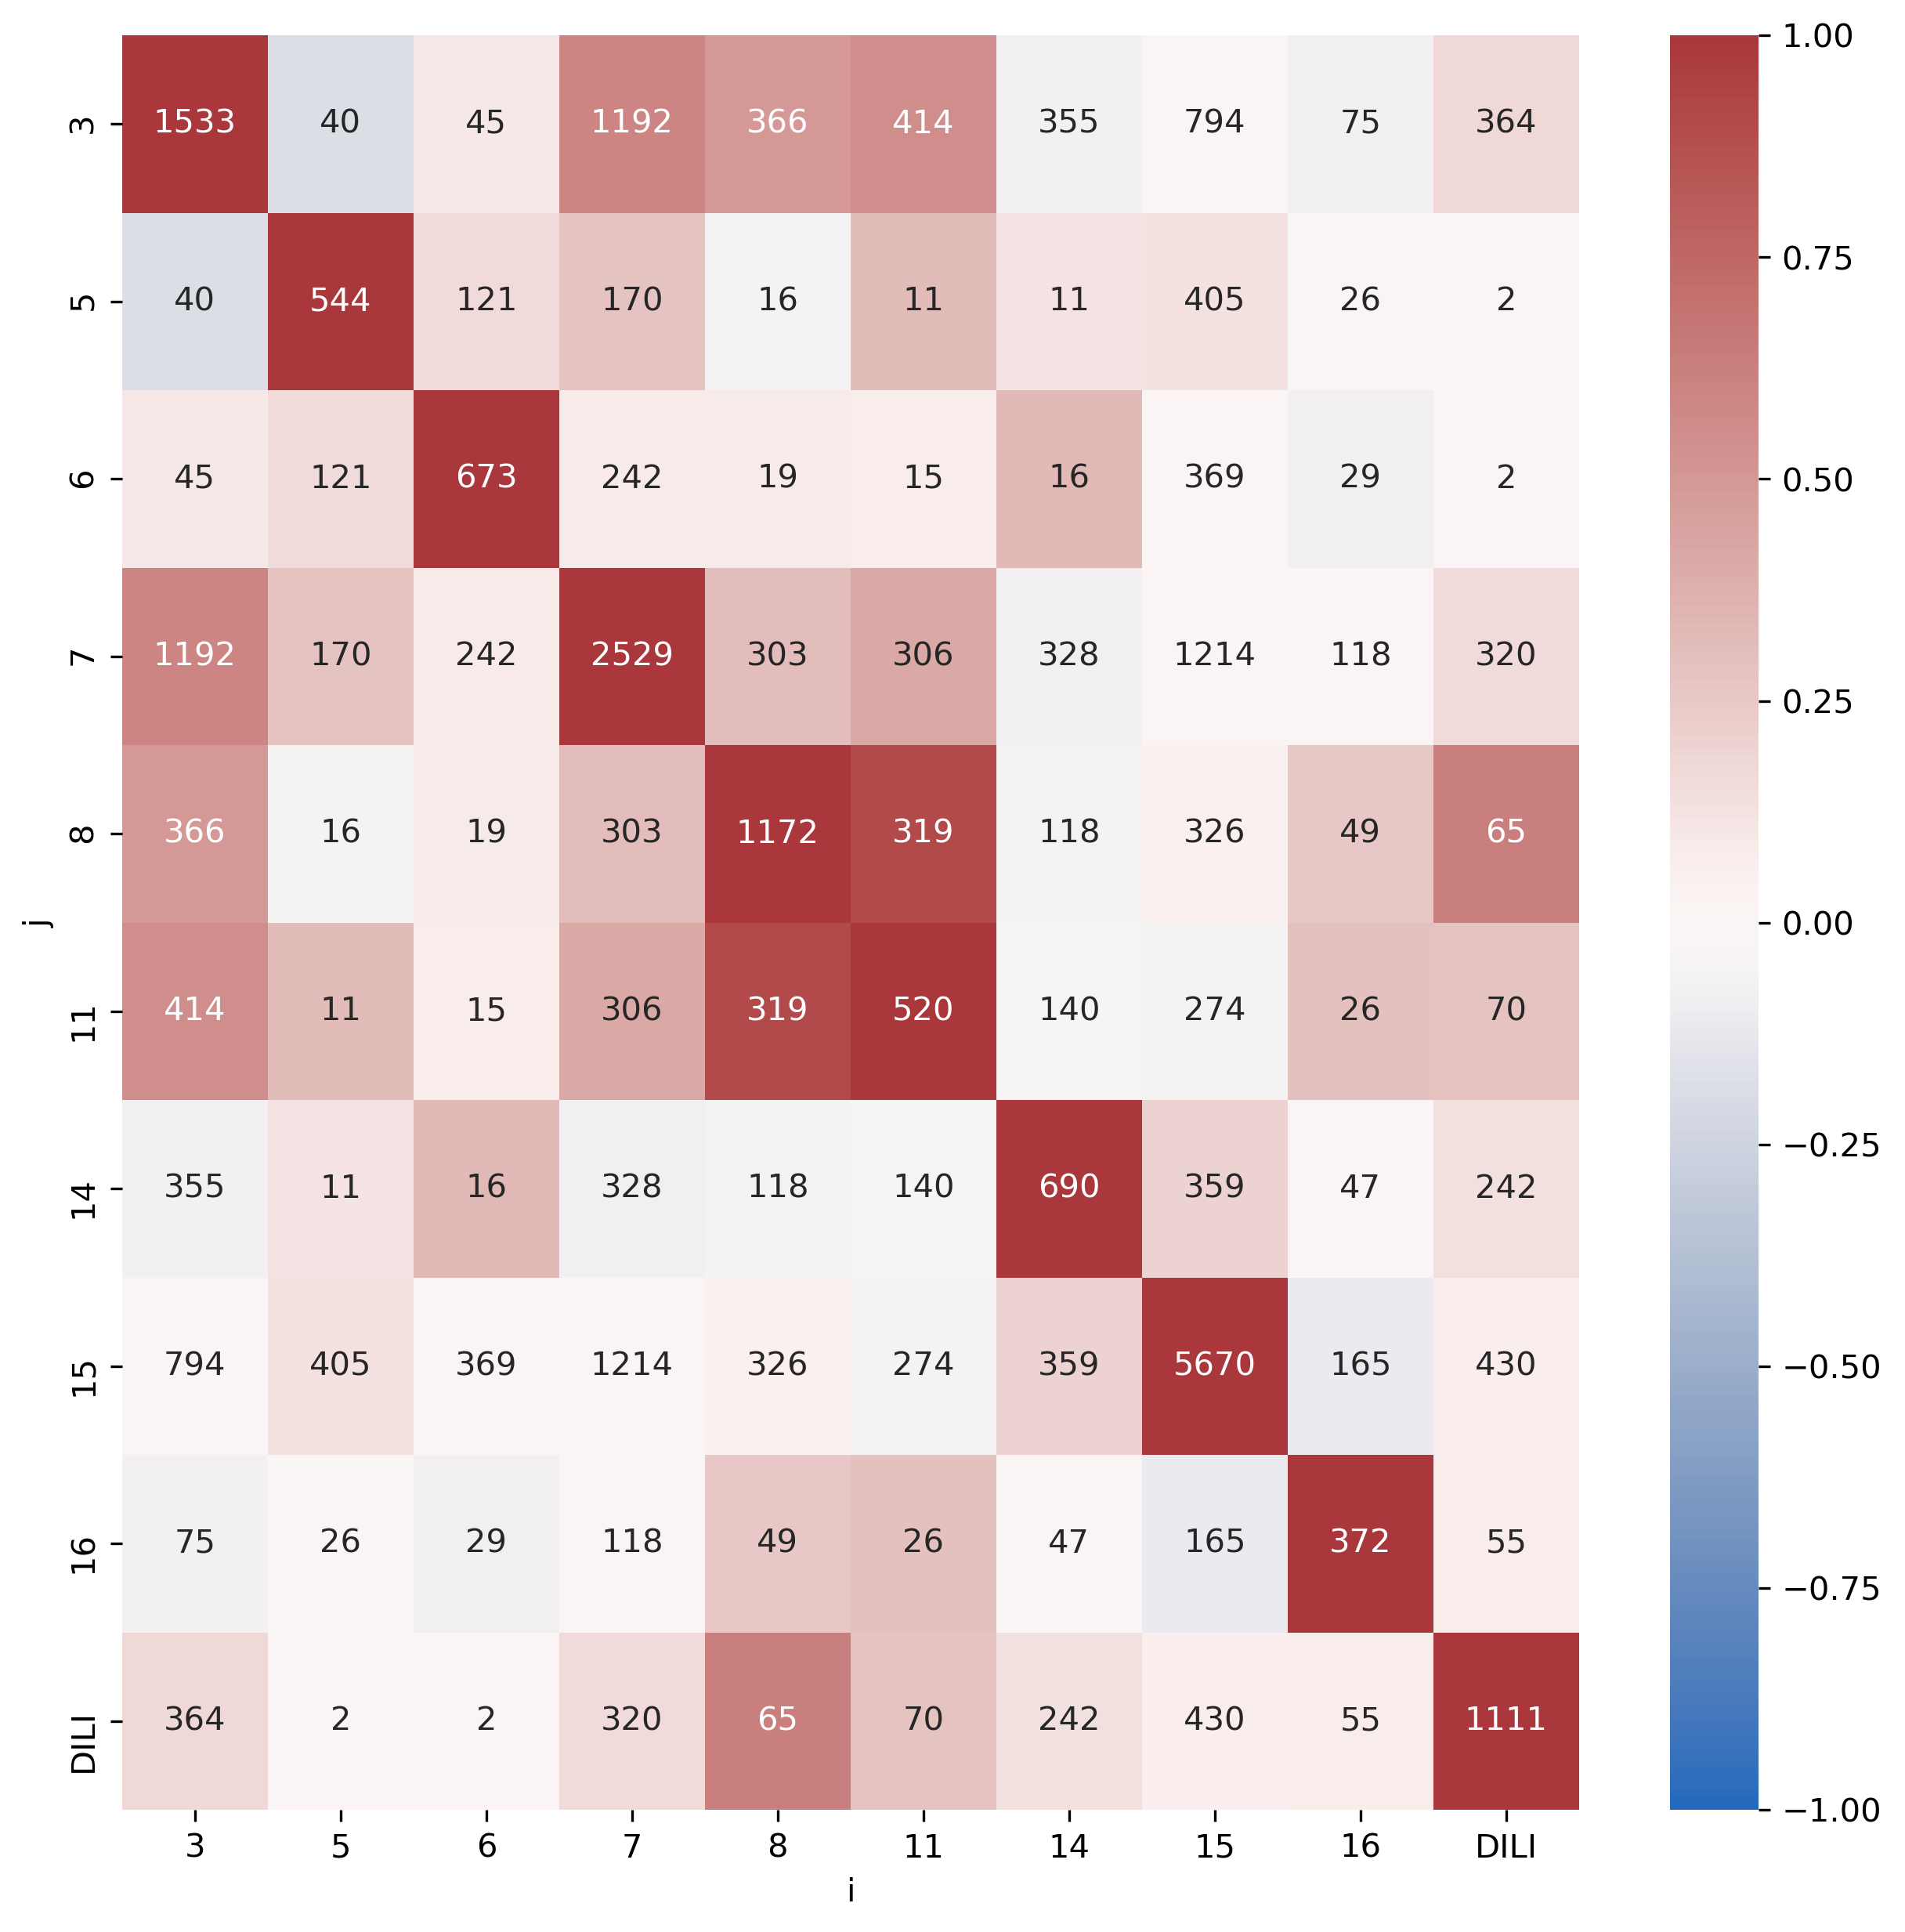

In [14]:
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["cohen_kappa_score"]:
    heatmap = results_kappa1.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    sns.heatmap(heatmap, annot=annot, cmap="vlag", vmin=-1, vmax=1.00, fmt='g')
    print(metric)
    plt.show()

In [15]:
annot = results_kappa1["cohen_kappa_score"].to_numpy().round(2)
annot = annot.reshape(10,10)
annot

array([[ 1.  , -0.18,  0.1 ,  0.6 ,  0.49,  0.55, -0.08,  0.  , -0.07,
         0.18],
       [-0.18,  1.  ,  0.16,  0.28, -0.06,  0.31,  0.12,  0.13, -0.03,
         0.  ],
       [ 0.1 ,  0.16,  1.  ,  0.09,  0.08,  0.07,  0.33,  0.01, -0.08,
         0.  ],
       [ 0.6 ,  0.28,  0.09,  1.  ,  0.31,  0.42, -0.08,  0.01,  0.01,
         0.16],
       [ 0.49, -0.06,  0.08,  0.31,  1.  ,  0.9 , -0.06,  0.05,  0.25,
         0.63],
       [ 0.55,  0.31,  0.07,  0.42,  0.9 ,  1.  , -0.04, -0.06,  0.29,
         0.28],
       [-0.08,  0.12,  0.33, -0.08, -0.06, -0.04,  1.  ,  0.21, -0.02,
         0.14],
       [ 0.  ,  0.13,  0.01,  0.01,  0.05, -0.06,  0.21,  1.  , -0.12,
         0.06],
       [-0.07, -0.03, -0.08,  0.01,  0.25,  0.29, -0.02, -0.12,  1.  ,
         0.07],
       [ 0.18,  0.  ,  0.  ,  0.16,  0.63,  0.28,  0.14,  0.06,  0.07,
         1.  ]])

cohen_kappa_score


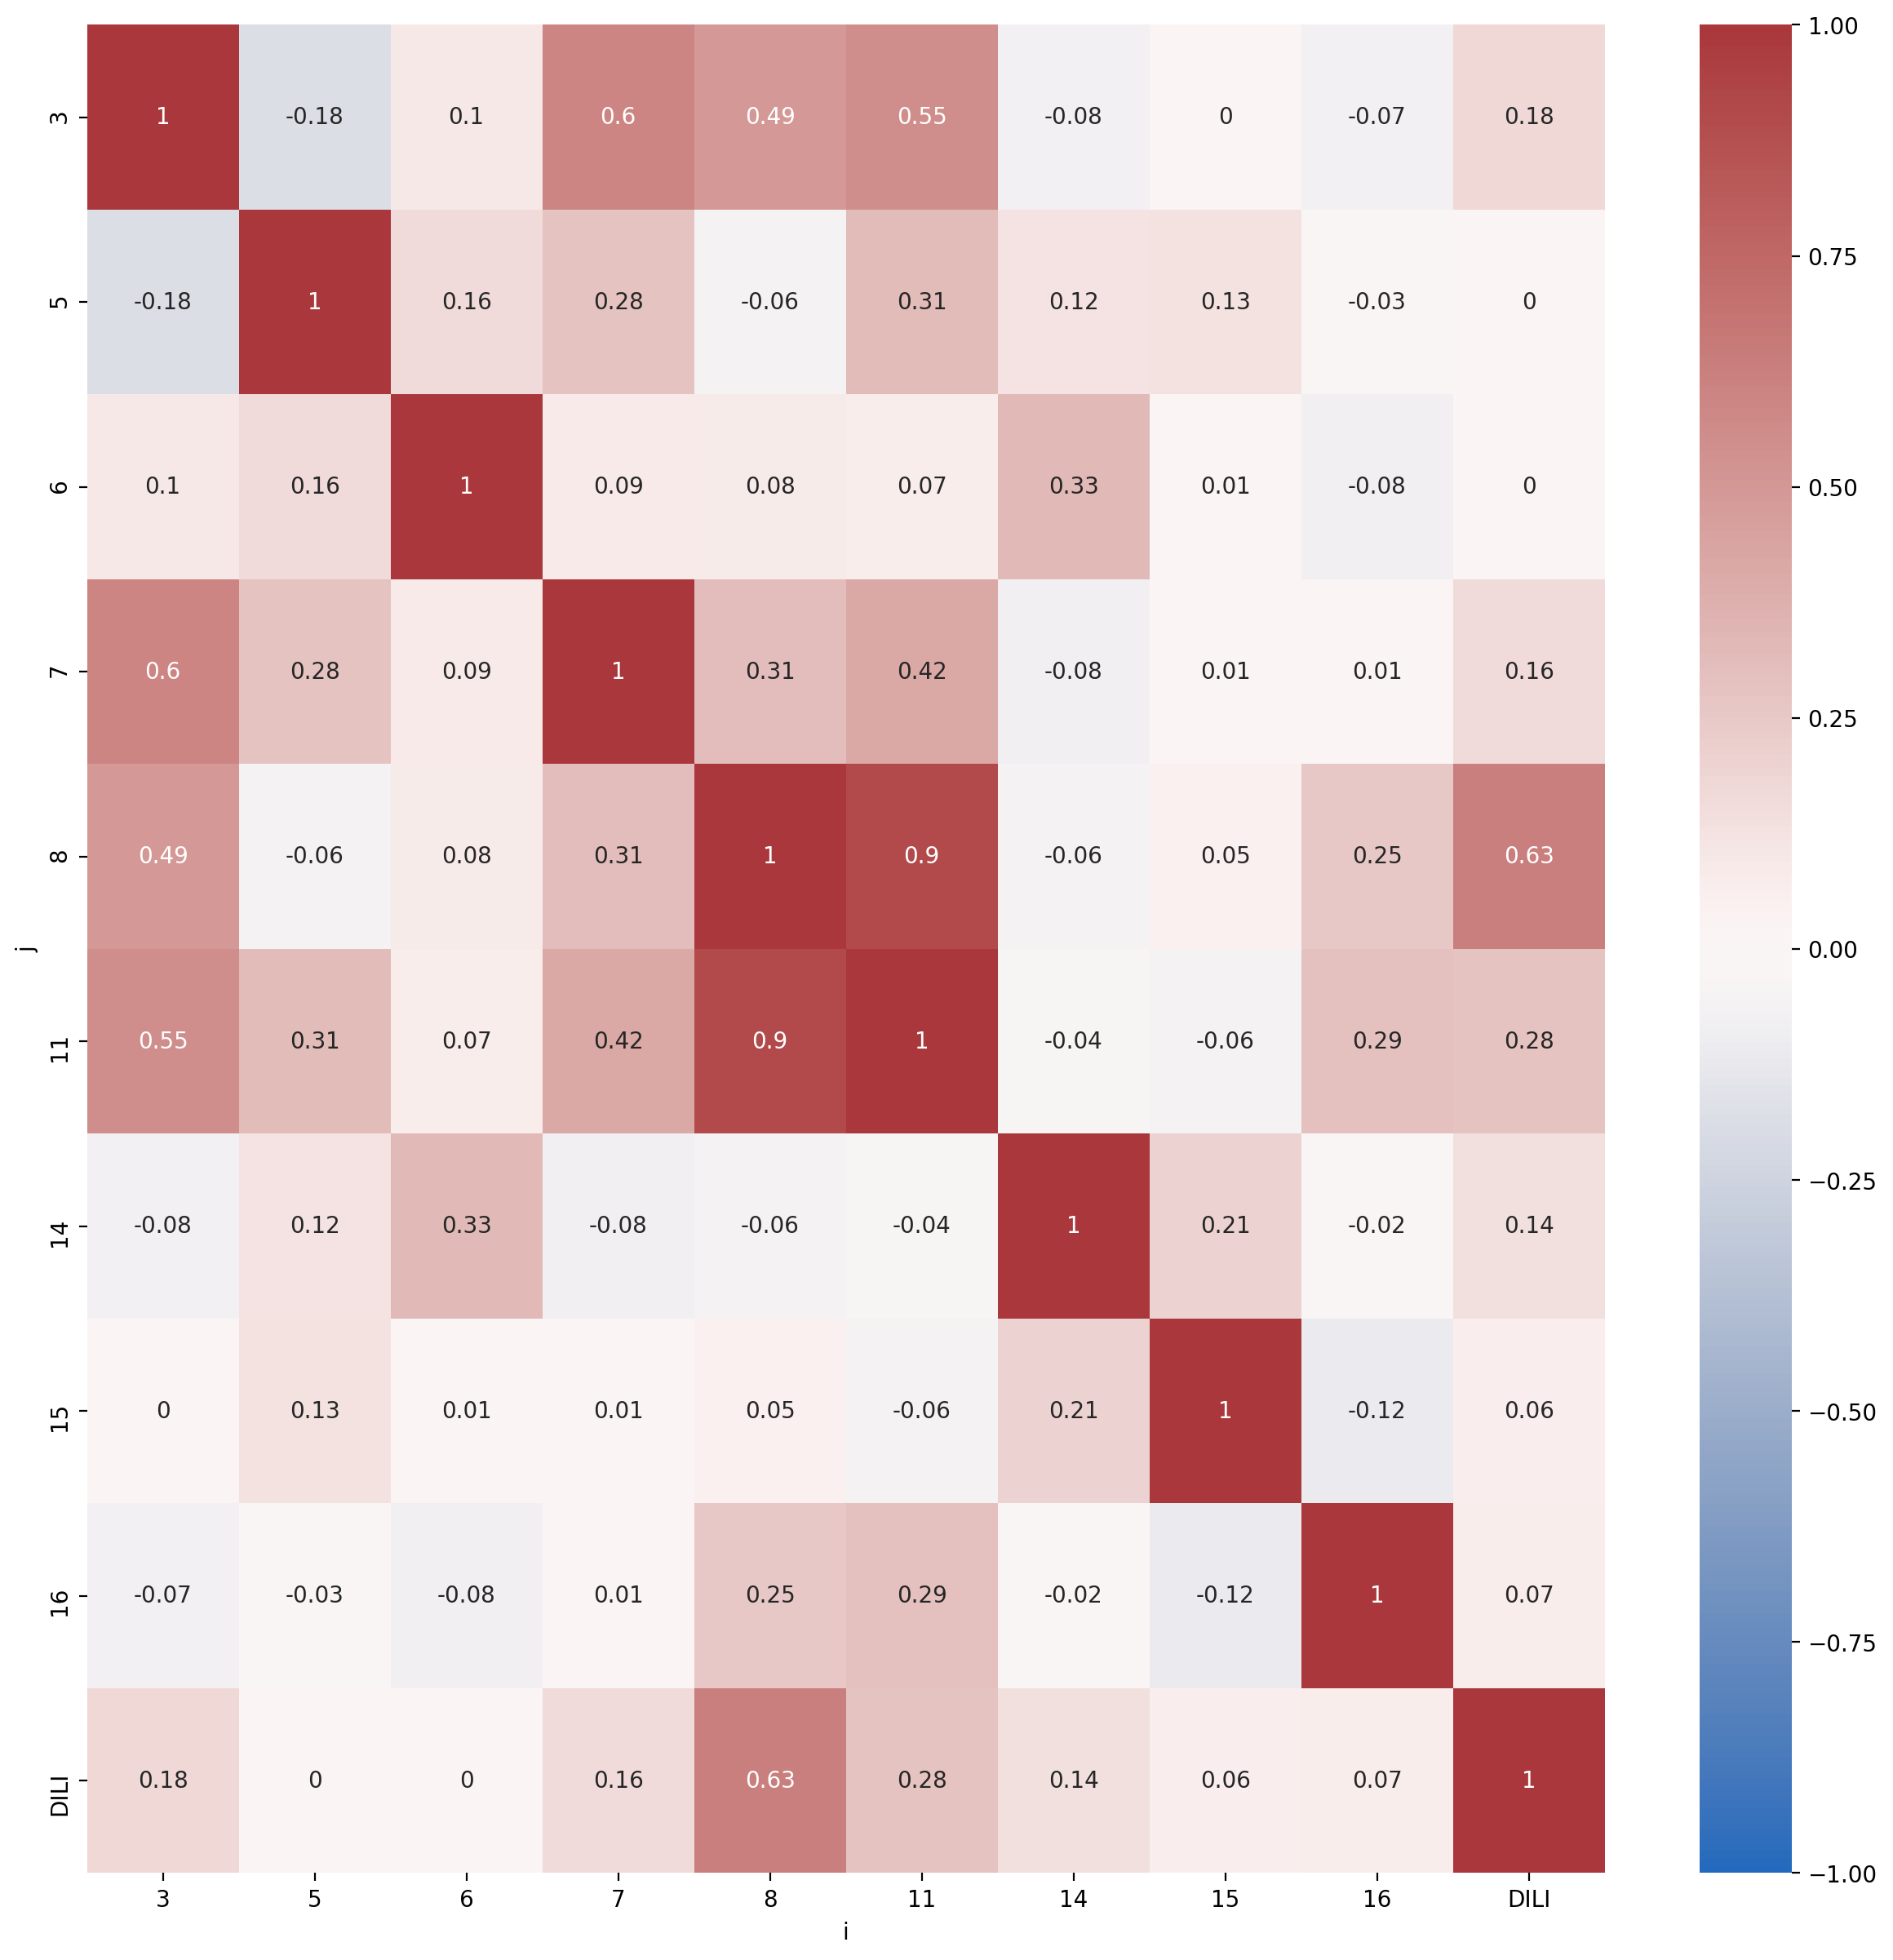

In [16]:
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["cohen_kappa_score"]:
    heatmap = results_kappa1.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(15, 15), dpi=200)
    sns.heatmap(heatmap, annot=annot, cmap="vlag", vmin=-1, vmax=1.00, fmt='g')
    print(metric)
    plt.show()